In [54]:
import matplotlib.pyplot as plt
from matplotlib import style
 
import numpy as np
from sklearn.cluster import KMeans
style.use('ggplot')
#ORIGINAL:
X = np.array([[1, 2],
 [1.5, 1.8],
 [5, 8],
 [8, 8],
 [1, 0.6],
 [9, 11]])

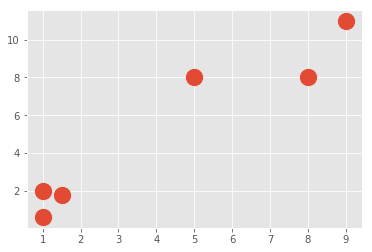

In [57]:
plt.scatter(X[:, 0],X[:, 1], s=150, linewidths = 5)
plt.show()


In [58]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
centroids = clf.cluster_centers_
labels = clf.labels_

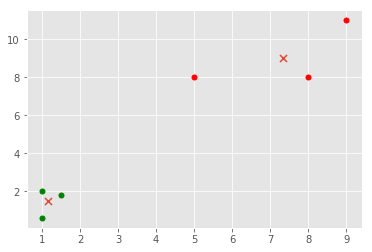

In [60]:
colors = ["g.","r.","c.","y."]
for i in range(len(X)):
 plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize =
10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x",
s=50, linewidths = 5)
plt.show()

In [61]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use ('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing,model_selection
import pandas as pd
df=pd.read_excel('titanic.xls')
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [62]:
df.drop(['name'], 1, inplace=True)
df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)
df.head()


C:\Users\Shreya Jaiswal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"


In [63]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
    def convert_to_int(val):
        return text_digit_vals[val]
    if df[column].dtype != np.int64 and df[column].dtype!= np.float64:
        column_contents = df[column].values.tolist()
        unique_elements = set(column_contents)
        x = 0
        for unique in unique_elements:
            if unique not in text_digit_vals:
                text_digit_vals[unique] = x
                x+=1
        df[column] = list(map(convert_to_int, df[column]))
    return df
df = handle_non_numerical_data(df)
df.head()












,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,272
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,254
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,254
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,135.0,254
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,254


In [64]:
df.drop(['boat'],1,inplace=True)
x=np.array(df.drop(['survived'],1).astype(float))
x=preprocessing.scale(x)
y=np.array(df['survived'])
clf=KMeans(n_clusters=2)
clf.fit(x)
correct=0
for i in range (len(x)):
    predict_me=np.array(x[i].astype(float))
    predict_me=predict_me.reshape(-1,len(predict_me))
    prediction=clf.predict(predict_me)
    if prediction[0]==y[i]:
        correct+=1
print(correct/len(x))


ValueError: could not convert string to float: 'female'

In [ ]:
from sklearn.cluster import MeanShift
import numpy as np
x=np.array([[1,1],[2,1],[1,0],[4,7],[3,5]])
